<a href="https://colab.research.google.com/github/Kumarraja25/DL/blob/main/Internship_IITBBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd

#Task-1:Dataset Preparation



##Labelling of data_file_514


In [25]:
df = pd.read_csv("/content/data_file_514.csv")
df.head()

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N)
0,Loop1_L1.c,pari,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,2025-05-07 14:57:47.509350,8,20177416.17647059,514
1,Loop1_L1.c,pari,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,2025-05-07 14:57:52.061299,16,20155164.967320263,514
2,Loop1_L1.c,pari,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,2025-05-07 14:57:56.586051,32,20167444.6375,514
3,Loop1_L1.c,pari,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,2025-05-07 14:58:01.112364,64,20293210.284210525,514
4,Loop1_L1.c,pari,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,2025-05-07 14:58:05.625390,128,20072119.310457516,514


In [26]:
tile_map = {
    8:1,
    16:2,
    32:3,
    64:4,
    128:5,
    256:6
}

pall_map = {
    "pari":0,
    "parj":1
}

df["Loop_Number"] = df["File Name"].apply(lambda x: int(x.split("_")[0].replace("Loop", "")))
df["Loop Order"] = df["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
# df["Loop Order"] = df["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
df["combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"] = df["Tile_size"].map(tile_map)
df["Parallel Dimension"] = df["Parallel Dimension"].map(pall_map)

df.head()

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order,"combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"
0,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:47.509350,8,20177416.17647059,514,1,1,1
1,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:52.061299,16,20155164.967320263,514,1,1,2
2,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:56.586051,32,20167444.6375,514,1,1,3
3,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:58:01.112364,64,20293210.284210525,514,1,1,4
4,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:58:05.625390,128,20072119.310457516,514,1,1,5


In [27]:
loop_nos_to_remove = df[df.eq("no runtime").any(axis=1)]["Loop_Number"].unique()
df = df[~df["Loop_Number"].isin(loop_nos_to_remove)]

df.to_csv("temp.csv", index=False)
df=pd.read_csv("temp.csv")
df.head()

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order,"combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"
0,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:47.509350,8,2.017742e+07,514,1,1,1
1,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:52.061299,16,2.015516e+07,514,1,1,2
2,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:57:56.586051,32,2.016744e+07,514,1,1,3
3,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:58:01.112364,64,2.029321e+07,514,1,1,4
4,Loop1_L1.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:58:05.625390,128,2.007212e+07,514,1,1,5


In [28]:
min_df = df.loc[df.groupby("File Name")["Execution Time(cycles)"].idxmin()]
min_df

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order,"combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"
35584,Loop1000_L1.c,1,33,2,20,3,14,1,9,1,...,4,2,0,2025-05-09 15:56:17.265136,128,1.468962e+07,514,1000,1,5
35589,Loop1000_L2.c,1,33,2,20,3,14,1,9,1,...,4,2,0,2025-05-09 15:56:39.190897,64,1.470072e+07,514,1000,2,4
35596,Loop1000_L3.c,1,33,2,20,3,14,1,9,1,...,4,2,0,2025-05-09 15:57:12.083697,128,1.469917e+07,514,1000,3,5
35601,Loop1000_L4.c,1,33,2,20,3,14,1,9,1,...,4,2,0,2025-05-09 15:57:33.975944,64,1.467919e+07,514,1000,4,4
35605,Loop1000_L5.c,1,33,2,20,3,14,1,9,1,...,4,2,0,2025-05-09 15:57:51.495011,16,1.467169e+07,514,1000,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Loop9_L2.c,0,30,3,16,4,14,3,13,2,...,6,0,2,2025-05-07 15:21:08.024206,8,2.003573e+07,514,9,2,1
316,Loop9_L3.c,0,30,3,16,4,14,3,13,2,...,6,0,2,2025-05-07 15:21:52.449309,128,2.010290e+07,514,9,3,5
322,Loop9_L4.c,0,30,3,16,4,14,3,13,2,...,6,0,2,2025-05-07 15:22:19.147725,128,2.014266e+07,514,9,4,5
328,Loop9_L5.c,0,30,3,16,4,14,3,13,2,...,6,0,2,2025-05-07 15:22:45.792876,128,2.010820e+07,514,9,5,5


In [29]:
min_order_df = min_df.loc[df.groupby("Loop_Number")["Execution Time(cycles)"].idxmin()]
min_order_df

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order,"combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"
10,Loop1_L2.c,0,29,3,18,5,18,1,7,3,...,3,0,2,2025-05-07 14:58:35.007379,128,2.005412e+07,514,1,2,5
81,Loop2_L6.c,1,19,6,20,12,12,3,6,3,...,3,2,0,2025-05-07 15:03:49.540329,64,1.199878e+07,514,2,6,4
93,Loop3_L2.c,0,28,6,14,3,14,6,6,1,...,5,0,2,2025-05-07 15:04:44.628763,64,2.004691e+07,514,3,2,4
146,Loop4_L5.c,0,20,13,21,3,14,5,7,2,...,6,0,2,2025-05-07 15:08:44.657895,32,2.265590e+07,514,4,5,3
179,Loop5_L4.c,1,31,5,11,9,12,4,7,3,...,6,2,0,2025-05-07 15:11:11.743373,256,1.725614e+07,514,5,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35442,Loop996_L2.c,0,18,2,34,1,12,2,10,1,...,4,0,2,2025-05-09 15:46:02.393612,8,1.473549e+07,514,996,2,1
35483,Loop997_L2.c,0,5,4,30,17,8,3,12,4,...,9,0,2,2025-05-09 15:49:00.814543,256,1.202490e+07,514,997,2,6
35536,Loop998_L5.c,1,21,11,20,1,10,5,10,1,...,7,2,0,2025-05-09 15:52:43.387706,128,1.465653e+07,514,998,5,5
35561,Loop999_L3.c,1,24,3,22,5,16,1,7,3,...,4,2,0,2025-05-09 15:54:34.612257,256,2.259075e+07,514,999,3,6


In [30]:
min_order_df = min_order_df[["Loop_Number"] + [col for col in df.columns if col != "Loop_Number" and col != "Tile_size"] + ["Tile_size"]]
min_order_df = min_order_df.drop(["File Name", "Time of run", "Execution Time(cycles)"], axis=1)

min_order_df

,Loop_Number,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Input Size(N),Loop Order,"combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size",Tile_size
10,1,0,29,3,18,5,18,1,7,3,...,12,0,4,3,0,2,514,2,5,128
81,2,1,19,6,20,12,12,3,6,3,...,0,8,0,3,2,0,514,6,4,64
93,3,0,28,6,14,3,14,6,6,1,...,14,0,4,5,0,2,514,2,4,64
146,4,0,20,13,21,3,14,5,7,2,...,14,0,7,6,0,2,514,5,3,32
179,5,1,31,5,11,9,12,4,7,3,...,0,5,0,6,2,0,514,4,6,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35442,996,0,18,2,34,1,12,2,10,1,...,20,0,5,4,0,2,514,2,1,8
35483,997,0,5,4,30,17,8,3,12,4,...,13,0,13,9,0,2,514,2,6,256
35536,998,1,21,11,20,1,10,5,10,1,...,0,6,0,7,2,0,514,5,5,128
35561,999,1,24,3,22,5,16,1,7,3,...,0,2,0,4,2,0,514,3,6,256


In [31]:
min_order_df.to_csv("final_514.csv", index=False)

##Labelling of data_file_518


In [32]:
df2 = pd.read_csv("/content/data_file_518.csv")
df2

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N)
0,Loop1_L1.c,pari,25,11,17,4,19,6,3,3,...,14,0,2,6,0,2,2025-05-14 18:50:05.250240,8,31260257.81372549,518
1,Loop1_L1.c,pari,25,11,17,4,19,6,3,3,...,14,0,2,6,0,2,2025-05-14 18:50:09.980680,16,31096119.166666664,518
2,Loop1_L1.c,pari,25,11,17,4,19,6,3,3,...,14,0,2,6,0,2,2025-05-14 18:50:14.741688,32,31181284.76102941,518
3,Loop1_L1.c,pari,25,11,17,4,19,6,3,3,...,14,0,2,6,0,2,2025-05-14 18:50:19.512701,64,31142981.5,518
4,Loop1_L1.c,pari,25,11,17,4,19,6,3,3,...,14,0,2,6,0,2,2025-05-14 18:50:24.281081,128,31063358.60784314,518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Loop1000_L6.c,parj,19,10,17,11,13,7,10,2,...,0,3,0,5,2,0,2025-05-16 21:09:51.919869,16,28466271.944444444,518
35996,Loop1000_L6.c,parj,19,10,17,11,13,7,10,2,...,0,3,0,5,2,0,2025-05-16 21:09:56.537044,32,28283857.125,518
35997,Loop1000_L6.c,parj,19,10,17,11,13,7,10,2,...,0,3,0,5,2,0,2025-05-16 21:10:01.165336,64,28355137.88235294,518
35998,Loop1000_L6.c,parj,19,10,17,11,13,7,10,2,...,0,3,0,5,2,0,2025-05-16 21:10:05.786247,128,28300784.213235296,518


In [33]:
tile_map = {
    8:1,
    16:2,
    32:3,
    64:4,
    128:5,
    256:6
}

pall_map = {
    "pari":0,
    "parj":1
}

df2["Loop_Number"] = df2["File Name"].apply(lambda x: int(x.split("_")[0].replace("Loop", "")))
df2["Loop Order"] = df2["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
# df["Loop Order"] = df["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
df2["Tile_size"] = df2["Tile_size"].map(tile_map)
df2["Parallel Dimension"] = df2["Parallel Dimension"].map(pall_map)
df2

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
0,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:05.250240,1,31260257.81372549,518,1,1
1,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:09.980680,2,31096119.166666664,518,1,1
2,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:14.741688,3,31181284.76102941,518,1,1
3,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:19.512701,4,31142981.5,518,1,1
4,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:24.281081,5,31063358.60784314,518,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:51.919869,2,28466271.944444444,518,1000,6
35996,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:56.537044,3,28283857.125,518,1000,6
35997,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:10:01.165336,4,28355137.88235294,518,1000,6
35998,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:10:05.786247,5,28300784.213235296,518,1000,6


In [34]:
loop_nos_to_remove = df2[df2.eq("no runtime").any(axis=1)]["Loop_Number"].unique()
df2 = df2[~df2["Loop_Number"].isin(loop_nos_to_remove)]

df2.to_csv("temp.csv", index=False)
df2=pd.read_csv("temp.csv")

df2

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
0,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:05.250240,1,3.126026e+07,518,1,1
1,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:09.980680,2,3.109612e+07,518,1,1
2,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:14.741688,3,3.118128e+07,518,1,1
3,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:19.512701,4,3.114298e+07,518,1,1
4,Loop1_L1.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:24.281081,5,3.106336e+07,518,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35383,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:51.919869,2,2.846627e+07,518,1000,6
35384,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:56.537044,3,2.828386e+07,518,1000,6
35385,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:10:01.165336,4,2.835514e+07,518,1000,6
35386,Loop1000_L6.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:10:05.786247,5,2.830078e+07,518,1000,6


In [35]:
min_df2 = df2.loc[df2.groupby("File Name")["Execution Time(cycles)"].idxmin()]
min_df2

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
35357,Loop1000_L1.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:07:37.726666,6,2.834086e+07,518,1000,1
35361,Loop1000_L2.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:07:59.726336,4,2.827508e+07,518,1000,2
35369,Loop1000_L3.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:08:40.177657,6,2.829827e+07,518,1000,3
35374,Loop1000_L4.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:06.820044,5,2.825218e+07,518,1000,4
35377,Loop1000_L5.c,1,19,10,17,11,13,7,10,2,...,0,5,2,0,2025-05-16 21:09:20.688587,2,2.828472e+07,518,1000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Loop9_L2.c,0,35,3,16,1,18,4,6,1,...,3,6,0,2,2025-05-14 19:14:44.251553,1,2.562334e+07,518,9,2
304,Loop9_L3.c,0,35,3,16,1,18,4,6,1,...,3,6,0,2,2025-05-14 19:15:29.735270,5,2.572619e+07,518,9,3
308,Loop9_L4.c,0,35,3,16,1,18,4,6,1,...,3,6,0,2,2025-05-14 19:15:47.860499,3,2.567687e+07,518,9,4
317,Loop9_L5.c,0,35,3,16,1,18,4,6,1,...,3,6,0,2,2025-05-14 19:16:28.726096,6,2.570263e+07,518,9,5


In [36]:
min_order_df2 = min_df2.loc[df2.groupby("Loop_Number")["Execution Time(cycles)"].idxmin()]
min_order_df2

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
8,Loop1_L2.c,0,25,11,17,4,19,6,3,3,...,2,6,0,2,2025-05-14 18:50:58.739165,3,3.101992e+07,518,1,2
43,Loop2_L2.c,0,32,12,10,0,17,5,7,0,...,5,4,0,2,2025-05-14 18:54:25.259263,2,2.030241e+07,518,2,2
81,Loop3_L2.c,0,25,4,22,2,9,3,11,2,...,6,6,0,2,2025-05-14 18:57:56.625627,4,9.502448e+06,518,3,2
115,Loop4_L2.c,0,30,8,12,6,12,5,7,2,...,13,6,0,2,2025-05-14 19:00:21.226710,2,1.220639e+07,518,4,2
176,Loop5_L6.c,1,23,1,20,7,13,2,8,3,...,0,5,2,0,2025-05-14 19:04:48.806362,3,1.749050e+07,518,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35233,Loop996_L5.c,1,28,7,10,9,10,4,4,4,...,0,3,2,0,2025-05-16 20:57:03.881092,2,6.774293e+06,518,996,5
35275,Loop997_L6.c,1,42,2,5,6,16,2,6,2,...,0,8,2,0,2025-05-16 21:00:14.658027,2,1.483650e+07,518,997,6
35310,Loop998_L6.c,1,22,2,26,6,14,2,9,3,...,0,5,2,0,2025-05-16 21:02:52.621033,1,2.288735e+07,518,998,6
35324,Loop999_L2.c,0,45,6,4,0,20,1,2,0,...,8,4,0,2,2025-05-16 21:04:05.262313,3,1.230337e+07,518,999,2


In [37]:
min_order_df2= min_order_df2[["Loop_Number"] + [col for col in df2.columns if col != "Loop_Number" and col != "Tile_size"] + ["Tile_size"]]
min_order_df2= min_order_df2.drop(["File Name", "Time of run", "Execution Time(cycles)"], axis=1)

min_order_df2

,Loop_Number,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],RAW in i-dimension,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Input Size(N),Loop Order,Tile_size
8,1,0,25,11,17,4,19,6,3,3,0,14,0,2,6,0,2,518,2,3
43,2,0,32,12,10,0,17,5,7,0,0,13,0,5,4,0,2,518,2,2
81,3,0,25,4,22,2,9,3,11,2,0,19,0,6,6,0,2,518,2,4
115,4,0,30,8,12,6,12,5,7,2,0,15,0,13,6,0,2,518,2,2
176,5,1,23,1,20,7,13,2,8,3,12,0,9,0,5,2,0,518,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35233,996,1,28,7,10,9,10,4,4,4,17,0,10,0,3,2,0,518,5,2
35275,997,1,42,2,5,6,16,2,6,2,16,0,5,0,8,2,0,518,6,2
35310,998,1,22,2,26,6,14,2,9,3,15,0,4,0,5,2,0,518,6,1
35324,999,0,45,6,4,0,20,1,2,0,0,18,0,8,4,0,2,518,2,3


In [38]:
min_order_df2.to_csv("final_518.csv", index=False)

##Labelling of data_file_520



In [39]:
df3 = pd.read_csv("/content/data_file_520.csv")
df3

<ipython-input-39-04712c97b99c>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv("/content/data_file_520.csv")


,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N)
0,Loop1_L1.c,pari,47,3,9,1,16,1,7,1,...,22,0,8,4,0,2,2025-05-20 18:09:22.329376,8,12393923.294444444,520
1,Loop1_L1.c,pari,47,3,9,1,16,1,7,1,...,22,0,8,4,0,2,2025-05-20 18:09:26.782754,16,12392294.0,520
2,Loop1_L1.c,pari,47,3,9,1,16,1,7,1,...,22,0,8,4,0,2,2025-05-20 18:09:31.244792,32,12366490.649999999,520
3,Loop1_L1.c,pari,47,3,9,1,16,1,7,1,...,22,0,8,4,0,2,2025-05-20 18:09:35.697337,64,12345564.105882354,520
4,Loop1_L1.c,pari,47,3,9,1,16,1,7,1,...,22,0,8,4,0,2,2025-05-20 18:09:40.141462,128,12340073.578947369,520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Loop1000_L6.c,parj,23,7,16,5,11,4,9,1,...,0,6,0,8,2,0,2025-05-22 19:53:55.593454,16,12237121.8,520
35996,Loop1000_L6.c,parj,23,7,16,5,11,4,9,1,...,0,6,0,8,2,0,2025-05-22 19:53:59.967625,32,12285200.1,520
35997,Loop1000_L6.c,parj,23,7,16,5,11,4,9,1,...,0,6,0,8,2,0,2025-05-22 19:54:04.316977,64,12253559.95,520
35998,Loop1000_L6.c,parj,23,7,16,5,11,4,9,1,...,0,6,0,8,2,0,2025-05-22 19:54:08.683657,128,12263210.6,520


In [40]:
tile_map = {
    8:1,
    16:2,
    32:3,
    64:4,
    128:5,
    256:6
}


pall_map = {
    "pari":0,
    "parj":1
}

df3["Loop_Number"] = df3["File Name"].apply(lambda x: int(x.split("_")[0].replace("Loop", "")))
df3["Loop Order"] = df3["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
# df["Loop Order"] = df["File Name"].apply(lambda x: int(x.split("_")[1].replace("L", "").replace(".c", "")))
df3["Tile_size"] = df3["Tile_size"].map(tile_map)
df3["Parallel Dimension"] = df3["Parallel Dimension"].map(pall_map)
df3

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
0,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:22.329376,1,12393923.294444444,520,1,1
1,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:26.782754,2,12392294.0,520,1,1
2,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:31.244792,3,12366490.649999999,520,1,1
3,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:35.697337,4,12345564.105882354,520,1,1
4,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:40.141462,5,12340073.578947369,520,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:55.593454,2,12237121.8,520,1000,6
35996,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:59.967625,3,12285200.1,520,1000,6
35997,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:54:04.316977,4,12253559.95,520,1000,6
35998,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:54:08.683657,5,12263210.6,520,1000,6


In [41]:
loop_nos_to_remove = df3[df3.eq("no runtime").any(axis=1)]["Loop_Number"].unique()
df3 = df3[~df3["Loop_Number"].isin(loop_nos_to_remove)]
df3.to_csv("temp.csv", index=False)
df3=pd.read_csv("temp.csv")

df3

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
0,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:22.329376,1,1.239392e+07,520,1,1
1,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:26.782754,2,1.239229e+07,520,1,1
2,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:31.244792,3,1.236649e+07,520,1,1
3,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:35.697337,4,1.234556e+07,520,1,1
4,Loop1_L1.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:40.141462,5,1.234007e+07,520,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35671,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:55.593454,2,1.223712e+07,520,1000,6
35672,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:59.967625,3,1.228520e+07,520,1000,6
35673,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:54:04.316977,4,1.225356e+07,520,1000,6
35674,Loop1000_L6.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:54:08.683657,5,1.226321e+07,520,1000,6


In [42]:
min_df3 = df3.loc[df3.groupby("File Name")["Execution Time(cycles)"].idxmin()]
min_df3

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
35643,Loop1000_L1.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:51:51.572989,4,1.223518e+07,520,1000,1
35649,Loop1000_L2.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:52:19.889022,4,1.222517e+07,520,1000,2
35656,Loop1000_L3.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:52:50.311796,5,1.222520e+07,520,1000,3
35661,Loop1000_L4.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:12.068298,4,1.218146e+07,520,1000,4
35665,Loop1000_L5.c,1,23,7,16,5,11,4,9,1,...,0,8,2,0,2025-05-22 19:53:29.461878,2,1.223760e+07,520,1000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Loop9_L2.c,1,32,6,17,0,15,7,7,0,...,0,10,2,0,2025-05-20 18:32:37.382632,3,2.570530e+07,520,9,2
302,Loop9_L3.c,1,32,6,17,0,15,7,7,0,...,0,10,2,0,2025-05-20 18:33:04.309183,3,2.576810e+07,520,9,3
310,Loop9_L4.c,1,32,6,17,0,15,7,7,0,...,0,10,2,0,2025-05-20 18:33:40.278952,5,2.575195e+07,520,9,4
317,Loop9_L5.c,1,32,6,17,0,15,7,7,0,...,0,10,2,0,2025-05-20 18:34:11.732986,6,2.567479e+07,520,9,5


In [43]:
min_order_df3 = min_df3.loc[df3.groupby("Loop_Number")["Execution Time(cycles)"].idxmin()]
min_order_df3

,File Name,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],...,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Time of run,Tile_size,Execution Time(cycles),Input Size(N),Loop_Number,Loop Order
8,Loop1_L2.c,0,47,3,9,1,16,1,7,1,...,8,4,0,2,2025-05-20 18:09:57.939059,3,1.223748e+07,520,1,2
45,Loop2_L2.c,0,29,3,16,9,10,4,6,3,...,10,5,0,2,2025-05-20 18:12:41.326286,4,9.498980e+06,520,2,2
76,Loop3_L1.c,1,36,9,8,0,16,3,9,0,...,0,5,2,0,2025-05-20 18:14:59.932052,5,2.027046e+07,520,3,1
139,Loop4_L6.c,1,32,3,12,3,18,2,6,2,...,0,8,2,0,2025-05-20 18:19:58.857628,2,2.030529e+07,520,4,6
152,Loop5_L2.c,0,31,14,11,0,16,1,7,0,...,5,7,0,2,2025-05-20 18:20:56.036051,3,1.222326e+07,520,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,Loop996_L1.c,0,25,12,15,4,12,5,6,3,...,3,4,0,2,2025-05-22 19:40:18.113891,3,1.768329e+07,520,996,1
35558,Loop997_L5.c,1,33,4,10,7,14,2,8,2,...,0,3,2,0,2025-05-22 19:45:00.527986,3,1.223233e+07,520,997,5
35575,Loop998_L2.c,0,44,3,10,0,21,1,4,0,...,10,7,0,2,2025-05-22 19:46:18.610764,2,2.049448e+07,520,998,2
35611,Loop999_L2.c,0,16,18,17,6,8,6,8,2,...,5,4,0,2,2025-05-22 19:49:29.073599,2,1.497691e+07,520,999,2


In [44]:
min_order_df3= min_order_df3[["Loop_Number"] + [col for col in df3.columns if col != "Loop_Number" and col != "Tile_size"] + ["Tile_size"]]
min_order_df3= min_order_df3.drop(["File Name", "Time of run", "Execution Time(cycles)"], axis=1)

min_order_df3

,Loop_Number,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],RAW in i-dimension,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Input Size(N),Loop Order,Tile_size
8,1,0,47,3,9,1,16,1,7,1,0,22,0,8,4,0,2,520,2,3
45,2,0,29,3,16,9,10,4,6,3,0,17,0,10,5,0,2,520,2,4
76,3,1,36,9,8,0,16,3,9,0,13,0,9,0,5,2,0,520,1,5
139,4,1,32,3,12,3,18,2,6,2,10,0,5,0,8,2,0,520,6,2
152,5,0,31,14,11,0,16,1,7,0,0,16,0,5,7,0,2,520,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,996,0,25,12,15,4,12,5,6,3,0,21,0,3,4,0,2,520,1,3
35558,997,1,33,4,10,7,14,2,8,2,17,0,6,0,3,2,0,520,5,3
35575,998,0,44,3,10,0,21,1,4,0,0,14,0,10,7,0,2,520,2,2
35611,999,0,16,18,17,6,8,6,8,2,0,23,0,5,4,0,2,520,2,2


In [45]:
min_order_df3.to_csv("final_520.csv", index=False)

##Conacatination of datasets

In [46]:
df5 = pd.read_csv("Classes_loop_order.csv")
df5

,Loop Number,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],RAW in i-dimension,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Input Size(N),Loop Order
0,1,0,33,5.0,6,9.0,14.0,3.0,7.0,4.0,0.0,14.0,0.0,5.0,6.0,0.0,2.0,512.0,3
1,2,1,36,3.0,10,5.0,12.0,3.0,4.0,2.0,25.0,0.0,5.0,0.0,2.0,2.0,0.0,512.0,3
2,3,1,25,6.0,20,5.0,15.0,2.0,6.0,1.0,18.0,0.0,10.0,0.0,6.0,2.0,0.0,512.0,6
3,4,0,32,5.0,16,0.0,17.0,1.0,5.0,2.0,0.0,17.0,0.0,5.0,4.0,0.0,2.0,512.0,2
4,5,0,34,13.0,5,1.0,19.0,3.0,5.0,4.0,0.0,15.0,0.0,3.0,8.0,0.0,2.0,512.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,996,0,35,9.0,10,5.0,13.0,3.0,5.0,3.0,0.0,13.0,0.0,11.0,5.0,0.0,2.0,516.0,3
1964,997,0,39,9.0,10,0.0,14.0,2.0,6.0,0.0,0.0,20.0,0.0,9.0,3.0,0.0,2.0,516.0,2
1965,998,1,23,8.0,20,4.0,11.0,5.0,9.0,3.0,15.0,0.0,7.0,0.0,4.0,2.0,0.0,516.0,5
1966,999,0,21,9.0,20,8.0,9.0,4.0,10.0,4.0,0.0,16.0,0.0,9.0,6.0,0.0,2.0,516.0,2


In [47]:
df6 = pd.read_csv("Classes_tile_sizes.csv")
df6

,Unnamed: 0,Parallel Dimension,References of A[f(i)][g(j)],References of A[f(j)][g(i)],References of X[f(i)],References of X[f(j)],Number of A[f(i)][g(j)],Number of A[f(j)][g(i)],Number of X[f(i)],Number of X[f(j)],RAW in i-dimension,RAW in j-dimension,WAR in i-dimension,WAR in j-dimension,Output Dependency,Max Dist in i-dimension,Max Dist in j-dimension,Input Size(N),Tile_size
0,1,0,33,5.0,6,9.0,14.0,3.0,7.0,4.0,0.0,14.0,0.0,5.0,6.0,0.0,2.0,512.0,2
1,2,1,36,3.0,10,5.0,12.0,3.0,4.0,2.0,25.0,0.0,5.0,0.0,2.0,2.0,0.0,512.0,6
2,3,1,25,6.0,20,5.0,15.0,2.0,6.0,1.0,18.0,0.0,10.0,0.0,6.0,2.0,0.0,512.0,4
3,4,0,32,5.0,16,0.0,17.0,1.0,5.0,2.0,0.0,17.0,0.0,5.0,4.0,0.0,2.0,512.0,4
4,5,0,34,13.0,5,1.0,19.0,3.0,5.0,4.0,0.0,15.0,0.0,3.0,8.0,0.0,2.0,512.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,996,0,35,9.0,10,5.0,13.0,3.0,5.0,3.0,0.0,13.0,0.0,11.0,5.0,0.0,2.0,516.0,3
1964,997,0,39,9.0,10,0.0,14.0,2.0,6.0,0.0,0.0,20.0,0.0,9.0,3.0,0.0,2.0,516.0,4
1965,998,1,23,8.0,20,4.0,11.0,5.0,9.0,3.0,15.0,0.0,7.0,0.0,4.0,2.0,0.0,516.0,3
1966,999,0,21,9.0,20,8.0,9.0,4.0,10.0,4.0,0.0,16.0,0.0,9.0,6.0,0.0,2.0,516.0,5


In [61]:
df1 = pd.read_csv('final_514.csv')
df2 = pd.read_csv('final_518.csv')
df3 = pd.read_csv('final_520.csv')
df4= pd.concat([df5, df6[df6.columns.difference(df5.columns)]], axis=1)

df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.drop(["Loop_Number","Loop Number","Unnamed: 0","combined_df = pd.concat([df1, df2], ignore_index=True)Tile_size"], axis=1, inplace=True)
df.to_csv("final_data.csv", index=False)

#

#Task-2: Determining the importance of Feature on each class

In [87]:
df = pd.read_csv("final_data.csv")
df

X = df.drop(["Loop Order", "Tile_size"], axis=1)


y1 = df["Loop Order"]
y2 = df["Tile_size"]




<Figure size 1200x700 with 0 Axes>

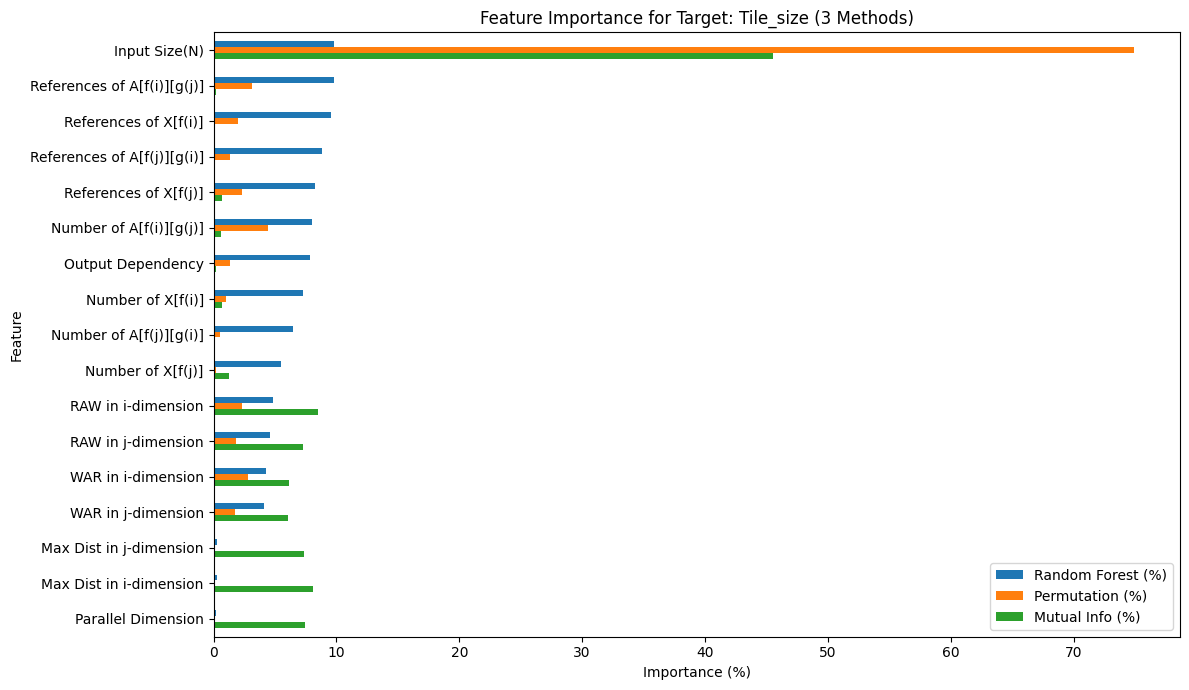

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance

df = pd.read_csv("final_data.csv")

feature_cols = df.columns.difference(["Loop Order", "Tile_size"])
X = df[feature_cols]
y = LabelEncoder().fit_transform(df["Tile_size"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1. Random Forest Importance

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
rf_importance = rf.feature_importances_
rf_importance_pct = 100 * rf_importance / rf_importance.sum()

# 2. Permutation Importance
perm = permutation_importance(rf, X_scaled, y, n_repeats=10, random_state=42)
perm_importance_pct = 100 * perm.importances_mean / perm.importances_mean.sum()

# 3. Mutual Information
mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_pct = 100 * mi / mi.sum()


# Combine and Plot
importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Random Forest (%)": rf_importance_pct,
    "Permutation (%)": perm_importance_pct,
    "Mutual Info (%)": mi_pct
})

importance_df = importance_df.set_index("Feature").sort_values("Random Forest (%)", ascending=False)

plt.figure(figsize=(12, 7))
importance_df.plot(kind="barh", figsize=(12, 7))
plt.title("Feature Importance for Target: Tile_size (3 Methods)")
plt.xlabel("Importance (%)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

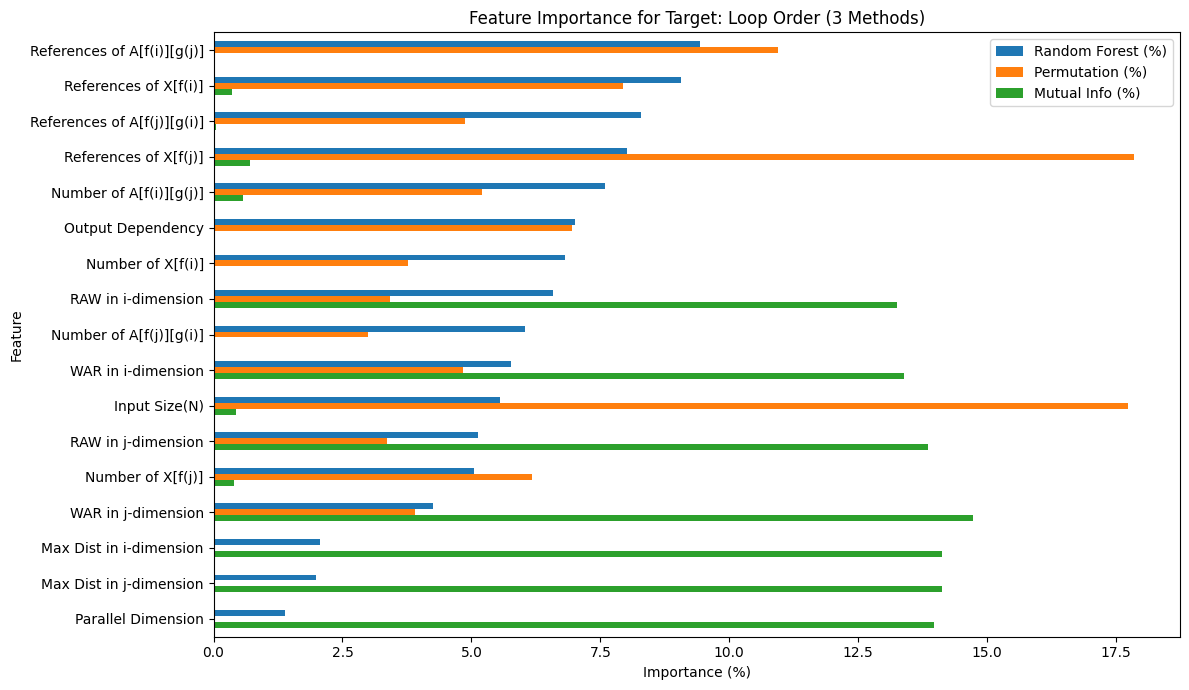

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance


df = pd.read_csv("final_data.csv")

feature_cols = df.columns.difference(["Loop Order", "Tile_size"])
X = df[feature_cols]
y = LabelEncoder().fit_transform(df["Loop Order"])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 1. Random Forest Importance

rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled, y)
rf_importance = rf.feature_importances_
rf_importance_pct = 100 * rf_importance / rf_importance.sum()


# 2. Permutation Importance
perm = permutation_importance(rf, X_scaled, y, n_repeats=10, random_state=42)
perm_importance_pct = 100 * perm.importances_mean / perm.importances_mean.sum()

# 3. Mutual Information

mi = mutual_info_classif(X_scaled, y, random_state=42)
mi_pct = 100 * mi / mi.sum()


# Combine and Plot
importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Random Forest (%)": rf_importance_pct,
    "Permutation (%)": perm_importance_pct,
    "Mutual Info (%)": mi_pct
})

importance_df = importance_df.set_index("Feature").sort_values("Random Forest (%)", ascending=False)

plt.figure(figsize=(12, 7))
importance_df.plot(kind="barh", figsize=(12, 7))
plt.title("Feature Importance for Target: Loop Order (3 Methods)")
plt.xlabel("Importance (%)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [85]:
import pandas as pd

loop_df = pd.DataFrame({
    "Feature": feature_cols,
    "Target": "Loop Order",
    "Random Forest (%)": rf_importance_pct,
    "Permutation (%)": perm_importance_pct,
    "Mutual Info (%)": mi_pct
})

tile_df = pd.DataFrame({
    "Feature": feature_cols,
    "Target": "Tile_size",
    "Random Forest (%)": rf_importance_tile,
    "Permutation (%)": perm_importance_tile,
    "Mutual Info (%)": mi_tile
})

combined_df = pd.concat([loop_df, tile_df], axis=0)

melted_df = combined_df.melt(id_vars=["Feature", "Target"],
                             var_name="Method",
                             value_name="Importance (%)")

melted_df.to_csv("feature_importance_summary.csv", index=False)


In [86]:
import pandas as pd

loop_df = pd.DataFrame({
    "Feature": feature_cols,
    "Target": "Loop Order",
    "Random Forest (%)": rf_importance_pct,
    "Permutation (%)": perm_importance_pct,
    "Mutual Info (%)": mi_pct
})

tile_df = pd.DataFrame({
    "Feature": feature_cols,
    "Target": "Tile_size",
    "Random Forest (%)": rf_importance_tile,
    "Permutation (%)": perm_importance_tile,
    "Mutual Info (%)": mi_tile
})

combined_df = pd.concat([loop_df, tile_df], axis=0)

melted_df = combined_df.melt(id_vars=["Feature", "Target"],
                             var_name="Method",
                             value_name="Importance (%)")
melted_df["Rank"] = melted_df.groupby(["Target", "Method"])["Importance (%)"].rank(ascending=False)
melted_df = melted_df[["Target", "Feature", "Method", "Importance (%)", "Rank"]]


csv_path = "feature_importance_summary_detailed.csv"
melted_df.to_csv(csv_path, index=False)

print(f"CSV saved to: {csv_path}")


CSV saved to: feature_importance_summary_detailed.csv
